# Исследовательский проект

Авторы: Дадыков Артемий

In [1]:
# 2 Опишите датасет. Укажите количество строк и столбцов. По каждой переменной
# укажите:
# + название и метки к переменной и к значениям, которые она принимает (если есть),
# + что она измеряет или отражает, в каких единицах измерения,
# + тип переменной: метрическая, категориальная (номинальная/порядковая/бинарная),
# + тип данных в колонке (string, integer, пр.),
# + число пустых значений.

In [2]:
import pandas as pd
from colorama import *

clear = lambda: print("\n" * 100)
def print_divider_line(): print("==========================================")
def description(heading):
    if heading == "Timestamp": return "время записи ответа"
    if heading == "Age": return "возраст IT-специалиста"
    if heading == "Gender": return "его пол"
    if heading == "City": return "город проживания"
    if heading == "Position": return "позиция на работе"
    if heading == "Total years of experience": return "годы опыта"
    if heading == "Years of experience in Germany": return "годы опыта в Германии"
    if heading == "Seniority level": return "уровень программирования"
    if heading == "Your main technology / programming language": return "основной язык программирования"
    if heading == "Other technologies/programming languages you use often": return "другие частоиспользуемые технологии"
    if heading == "Yearly brutto salary (without bonus and stocks) in EUR": return "годовая зарплата"
    if heading == "Yearly bonus + stocks in EUR": return "годовая зарплата с учетом премии"
    if heading == "Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country": return "зарплата год назад"
    if heading == "Annual bonus+stocks one year ago. Only answer if staying in same country": return "годовой заработок за прошлый год с учетом премии"
    if heading == "Number of vacation days": return "количество отпускных дней"
    if heading == "Employment status": return "статус занятости"
    if heading == "Сontract duration": return "время контракта"
    if heading == "Main language at work": return "основной язык общения"
    if heading == "Company size": return "размер компании"
    if heading == "Company type": return "тип компании"
    if heading == "Have you lost your job due to the coronavirus outbreak?": return "потеря работы во время коронавируса"
    if heading == "Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week": return "заставляли ли Вас взять меньшее количество рабочих дней? Сколько часов?"
    if heading == "Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR": return "Дополнительные выплаты в связи с работой из дома"

df = pd.read_csv("IT Salary Survey EU  2020.csv")
lines, columns = df.shape

print_divider_line()
print(Style.BRIGHT + Fore.CYAN + f"Размер датасета = {lines} строк * {columns} столбцов" + Style.RESET_ALL)
print_divider_line()

headings_of_columns = df.columns

df_full_lines = pd.DataFrame(columns=headings_of_columns)
df_full_lines = pd.concat([df_full_lines, df.dropna()])
df_full_lines = df_full_lines.iloc[1:2].dtypes
for i in range(columns):
    print(f"{headings_of_columns[i]} - \033[1m'{df_full_lines[i]}'\033[0m # \x1B[3m{description(headings_of_columns[i])}\x1B[0m")

print_divider_line()

df_count_nulls = df.isna().sum()
count_null = 0
print(Style.BRIGHT + "Пустые ячейки" + Style.RESET_ALL)
for i in range(columns):
    print(f"{headings_of_columns[i]} - {Style.BRIGHT + str(df_count_nulls[i]) + Style.RESET_ALL}")
    count_null += df_count_nulls[i]
print(f"Всего пустых ячеек = \x1B[3m\033[1m\033[31m{count_null}\x1B[0m")

Размер датасета = 1253 строк * 23 столбцов
Timestamp - 'object' # время записи ответа
Age - 'float64' # возраст IT-специалиста
Gender - 'object' # его пол
City - 'object' # город проживания
Position  - 'object' # None
Total years of experience - 'object' # годы опыта
Years of experience in Germany - 'object' # годы опыта в Германии
Seniority level - 'object' # уровень программирования
Your main technology / programming language - 'object' # основной язык программирования
Other technologies/programming languages you use often - 'object' # другие частоиспользуемые технологии
Yearly brutto salary (without bonus and stocks) in EUR - 'float64' # годовая зарплата
Yearly bonus + stocks in EUR - 'object' # годовая зарплата с учетом премии
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country - 'float64' # зарплата год назад
Annual bonus+stocks one year ago. Only answer if staying in same country - 'object' # годовой заработок за прошлый год с 

In [4]:
# 3 Измените тип данных в столбцах на более подходящий (если применимо).

In [5]:
# Список необходимости столбцов:
# [-] Timestamp
# [+] Age
# [+] Gender
# [+] City
# [+] Position
# [+] Total years of experience
# [-] Years of experience in Germany
# [+] Seniority level
# [+] Your main technology / programming language
# [+] Other technologies/programming languages you use often
# [+] Yearly brutto salary (without bonus and stocks) in EUR
# [-] Yearly bonus + stocks in EUR
# [-] Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country
# [-] Annual bonus+stocks one year ago. Only answer if staying in same country
# [-] Number of vacation days
# [+] Employment status
# [-] Сontract duration
# [+] Main language at work
# [+] Company size
# [+] Company type
# [+] Have you lost your job due to the coronavirus outbreak?
# [-] Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week
# [+] Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR

# Удаление лишних столбцов относительно данных гипотез
df = df.drop(["Timestamp",
              "Years of experience in Germany",
              "Yearly bonus + stocks in EUR",
              "Annual bonus+stocks one year ago. Only answer if staying in same country",
              "Number of vacation days",
              "Сontract duration",
              "Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"],
             axis = 1)

# Переименование столбцов для более удобного пользования
dict_names = {"Position ": "Position",
              "Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country": "Prev salary",
              "Total years of experience": "Experience",
              "Your main technology / programming language": "Main technology",
              "Other technologies/programming languages you use often": "Additional technology",
              "Yearly brutto salary (without bonus and stocks) in EUR": "Salary",
              "Main language at work": "Communication language",
              "Have you lost your job due to the coronavirus outbreak?": "Job loss in rough time",
              "Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR": "Support in rough time"
              }
df.rename(columns=dict_names, inplace=True)

def does_person_lose_job_in_rough_time(x):
    if "no" in str(x).lower(): return False
    elif "yes" in str(x).lower(): return True
    else: return None

def monetary_support(x):
    if "yes" in str(x).lower(): return 500
    if "no" in str(x).lower(): return 0
    if x == None: return None
    try: return float(x.split()[0])
    except: return None

pd.to_numeric(df["Age"], errors='coerce', downcast='integer')
df["Gender"] = df["Gender"].apply(lambda x: x if x in ["Male", "Female"] else None)
df["City"] = df["City"].astype(str)
df["Position"] = df["Position"].astype(str)
pd.to_numeric(df["Experience"], errors='coerce', downcast='integer')
df["Seniority level"] = df["Seniority level"].astype(str)
df["Main technology"] = df["Main technology"].astype(str)
df["Additional technology"] = df["Additional technology"].astype(str)
pd.to_numeric(df["Salary"], errors='coerce')
pd.to_numeric(df["Prev salary"], errors='coerce')
df["Employment status"] = df["Employment status"].astype(str)
df["Communication language"] = df["Communication language"].astype(str)
df["Company type"] = df["Company type"].astype(str)
df["Company size"] = df["Company size"].astype(str)
df["Job loss in rough time"] = df["Job loss in rough time"].apply(lambda x: does_person_lose_job_in_rough_time(x))
df["Support in rough time"] = df["Support in rough time"].apply(lambda x: monetary_support(x))


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1226 non-null   float64
 1   Gender                  1241 non-null   object 
 2   City                    1253 non-null   object 
 3   Position                1253 non-null   object 
 4   Experience              1237 non-null   object 
 5   Seniority level         1253 non-null   object 
 6   Main technology         1253 non-null   object 
 7   Additional technology   1253 non-null   object 
 8   Salary                  1253 non-null   float64
 9   Prev salary             885 non-null    float64
 10  Employment status       1253 non-null   object 
 11  Communication language  1253 non-null   object 
 12  Company size            1253 non-null   object 
 13  Company type            1253 non-null   object 
 14  Job loss in rough time  1227 non-null   

In [7]:
# Описание переменных
# int Age
# str Gender => Male/Female
# str City
# str Position
# int Experience
# str Seniority level
# str Main technology
# str Additional technology
# float Salary €
# float Prev salary €
# str Employment status
# str Communication language
# str Company size
# str Company type
# bool Job loss in rough time
# float Support in rough time - количество денег

In [8]:
df.dtypes

Age                       float64
Gender                     object
City                       object
Position                   object
Experience                 object
Seniority level            object
Main technology            object
Additional technology      object
Salary                    float64
Prev salary               float64
Employment status          object
Communication language     object
Company size               object
Company type               object
Job loss in rough time     object
Support in rough time     float64
dtype: object

In [9]:
df

,Age,Gender,City,Position,Experience,Seniority level,Main technology,Additional technology,Salary,Prev salary,Employment status,Communication language,Company size,Company type,Job loss in rough time,Support in rough time
0,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,75000.0,Full-time employee,English,51-100,Product,False,NaN
1,26.0,Male,Berlin,Backend Developer,7,Senior,Ruby,nan,80000.0,82000.0,Full-time employee,English,101-1000,Product,False,NaN
2,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,100000.0,Self-employed (freelancer),English,101-1000,Product,True,NaN
3,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,nan,54000.0,NaN,Full-time employee,English,51-100,Startup,False,NaN
4,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,62000.0,Full-time employee,English,101-1000,Product,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,Male,Berlin,Backend Developer,9,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,70000.0,Full-time employee,English,51-100,Product,True,NaN
1249,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,Senior,consumer analysis,nan,60000.0,48000.0,Full-time employee,English,1000+,Product,False,0.0
1250,39.0,Male,Munich,IT Operations Manager,15,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,90000.0,Full-time employee,English,101-1000,eCommerce,False,NaN
1251,26.0,Male,Saarbrücken,Frontend Developer,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,33800.0,Full-time employee,German,101-1000,Product,False,0.0


In [10]:
# 4 Рассчитайте новый столбец с данными на основе существующего(их).
# Рассмотрим изменение ЗП. Хотел рассмотреть местный язык и язык, на котором говорят на работе, 
# но это было чересчур трудозатратно.
# Пришлось добавлять еще один DataFrame, множество словарей. Поэтому сделал попроще
df["Salary difference"] = (df["Salary"] - df["Prev salary"])

In [11]:
df

,Age,Gender,City,Position,Experience,Seniority level,Main technology,Additional technology,Salary,Prev salary,Employment status,Communication language,Company size,Company type,Job loss in rough time,Support in rough time,Salary difference
0,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,75000.0,Full-time employee,English,51-100,Product,False,NaN,5000.0
1,26.0,Male,Berlin,Backend Developer,7,Senior,Ruby,nan,80000.0,82000.0,Full-time employee,English,101-1000,Product,False,NaN,-2000.0
2,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,100000.0,Self-employed (freelancer),English,101-1000,Product,True,NaN,20000.0
3,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,nan,54000.0,NaN,Full-time employee,English,51-100,Startup,False,NaN,NaN
4,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,62000.0,Full-time employee,English,101-1000,Product,False,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,Male,Berlin,Backend Developer,9,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,70000.0,Full-time employee,English,51-100,Product,True,NaN,0.0
1249,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,Senior,consumer analysis,nan,60000.0,48000.0,Full-time employee,English,1000+,Product,False,0.0,12000.0
1250,39.0,Male,Munich,IT Operations Manager,15,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,90000.0,Full-time employee,English,101-1000,eCommerce,False,NaN,20000.0
1251,26.0,Male,Saarbrücken,Frontend Developer,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,33800.0,Full-time employee,German,101-1000,Product,False,0.0,4550.0


In [38]:
list_salaries_difference = df["Salary difference"].tolist()
Positive_Salary_difference = []
Negative_Salary_difference = []
for i in range(len(list_salaries_difference)):
    if list_salaries_difference[i] > 0:
        Positive_Salary_difference.append(list_salaries_difference[i])
    elif list_salaries_difference[i] < 0:
        Negative_Salary_difference.append(list_salaries_difference[i])
print(f'{round(df["Salary difference"].mean())} € - общее изменение') # В общем
print(f'{round(sum(Positive_Salary_difference) / len(Positive_Salary_difference))} € - изменение только в положительную сторону')
print(f'{round(sum(Negative_Salary_difference) / len(Negative_Salary_difference))} € - изменение только в отрицательную сторону')

6503 € - общее изменение
10389 € - изменение только в положительную сторону
-38426 € - изменение только в отрицательную сторону


In [13]:
# 5 Перекодируйте любую метрическую переменную в категориальную. Обоснуйте
# выбранные интервалы/группы.
# При поиске зависимостей ЗП и работы необходимо учитывать количество рабочих часов
employment_status_list = df["Employment status"].tolist()
for status in set(employment_status_list):
    print(status)

nan
Full-time employee
Self-employed (freelancer)
Founder
full-time, but 32 hours per week (it was my request, I'm a student)
Intern
Werkstudent
working student
Working Student
Part-time employee
Company Director
Full-time position, part-time position, & self-employed (freelancing, tutoring)


In [14]:
employment_status_list_in_hours = []
for status in employment_status_list:
    if status == None or status == "nan" or status == "":
        employment_status_list_in_hours.append(None)
    elif status == "Full-time position, part-time position, & self-employed (freelancing, tutoring)":
        employment_status_list_in_hours.append(60)
    elif status == "full-time, but 32 hours per week (it was my request, I'm a student)":
        employment_status_list_in_hours.append(32)
    elif status == "Founder":
        employment_status_list_in_hours.append(50)
    elif status == "Working Student" or status == "Intern" or status == "Werkstudent" or status == "working student":
        employment_status_list_in_hours.append(30)
    elif status == "Self-employed (freelancer)":
        employment_status_list_in_hours.append(40)
    elif status == "Part-time employee":
        employment_status_list_in_hours.append(25)
    elif status == "Full-time employee":
        employment_status_list_in_hours.append(40)
    else:
        employment_status_list_in_hours.append(None)
df["Working week hours"] = employment_status_list_in_hours
df

,Age,Gender,City,Position,Experience,Seniority level,Main technology,Additional technology,Salary,Prev salary,Employment status,Communication language,Company size,Company type,Job loss in rough time,Support in rough time,Salary difference,Working week hours
0,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,75000.0,Full-time employee,English,51-100,Product,False,NaN,5000.0,40.0
1,26.0,Male,Berlin,Backend Developer,7,Senior,Ruby,nan,80000.0,82000.0,Full-time employee,English,101-1000,Product,False,NaN,-2000.0,40.0
2,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,100000.0,Self-employed (freelancer),English,101-1000,Product,True,NaN,20000.0,40.0
3,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,nan,54000.0,NaN,Full-time employee,English,51-100,Startup,False,NaN,NaN,40.0
4,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,62000.0,Full-time employee,English,101-1000,Product,False,NaN,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,Male,Berlin,Backend Developer,9,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,70000.0,Full-time employee,English,51-100,Product,True,NaN,0.0,40.0
1249,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,Senior,consumer analysis,nan,60000.0,48000.0,Full-time employee,English,1000+,Product,False,0.0,12000.0,40.0
1250,39.0,Male,Munich,IT Operations Manager,15,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,90000.0,Full-time employee,English,101-1000,eCommerce,False,NaN,20000.0,40.0
1251,26.0,Male,Saarbrücken,Frontend Developer,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,33800.0,Full-time employee,German,101-1000,Product,False,0.0,4550.0,40.0


In [15]:
# 6 Сформируйте срез по таблице и транспонируйте его.
df[2:5]

,Age,Gender,City,Position,Experience,Seniority level,Main technology,Additional technology,Salary,Prev salary,Employment status,Communication language,Company size,Company type,Job loss in rough time,Support in rough time,Salary difference,Working week hours
2,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,100000.0,Self-employed (freelancer),English,101-1000,Product,True,NaN,20000.0,40.0
3,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,nan,54000.0,NaN,Full-time employee,English,51-100,Startup,False,NaN,NaN,40.0
4,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,62000.0,Full-time employee,English,101-1000,Product,False,NaN,0.0,40.0


In [16]:
df[2:5].T

,2,3,4
Age,29.0,28.0,37.0
Gender,Male,Male,Male
City,Berlin,Berlin,Berlin
Position,Software Engineer,Frontend Developer,Backend Developer
Experience,12,4,17
Seniority level,Lead,Junior,Senior
Main technology,Javascript / Typescript,Javascript,C# .NET
Additional technology,"Javascript / Typescript, Docker",nan,".NET, SQL, AWS, Docker"
Salary,120000.0,54000.0,62000.0
Prev salary,100000.0,NaN,62000.0


In [17]:
# 7 Отсортируйте значения по нескольким полям (многоуровневая сортировка) и выведите
# 20 первых строк таблицы, содержащих столбцы с переменными, по которым проводилась
# сортировка.
df_new = df[['Salary', 'Age', 'Working week hours']]
df_sorted = df_new.sort_values(by=['Salary', 'Age', 'Working week hours'], ascending=[False, True, True])
df_sorted.head(20)

,Salary,Age,Working week hours
473,1.000000e+11,NaN,NaN
853,5.000000e+08,29.0,40.0
778,8.500000e+05,42.0,40.0
576,3.000000e+05,24.0,40.0
630,2.500000e+05,40.0,40.0
804,2.400000e+05,20.0,40.0
441,2.000000e+05,32.0,40.0
966,2.000000e+05,35.0,40.0
574,2.000000e+05,38.0,40.0
1223,2.000000e+05,45.0,40.0


# Гипотезы
1. Зависимость ЗП от страны

2. Зависимость ЗП от возраста

3. Зависимость ЗП от языка программирования

4. Зависимость ЗП от пола

5. Зависимость ЗП от уровня программирования

6. Зависимость ЗП от опыта

7. Зависимость ЗП от размера компании

8. Зависимость уровня от опыта

9. Сколько получают C#-программисты и Python-программисты

10. Является ли работа в IT стабильной?


In [18]:
# 1. Зависимость ЗП от страны
# Переменные: город => страна, ЗП

df_country_city = pd.read_csv("worldcities.csv")
dict_city_country = dict()

world_cities = df_country_city["city"].tolist()
world_countries = df_country_city["country"].tolist()
for i in range(len(world_countries)):
    dict_city_country[world_cities[i]] = world_countries[i]

countries_from_df = []
cities_from_df = df["City"].tolist()
for city in cities_from_df:
    try: countries_from_df.append(dict_city_country[city])
    except:
        if city == "Schleswig-Holstein": countries_from_df.append("Germany")
        elif city == "Konstanz area": countries_from_df.append("Germany")
        elif city == "Mannheim": countries_from_df.append("Germany")
        elif city == "Boeblingen": countries_from_df.append("Germany")
        elif city == "Nürnberg": countries_from_df.append("Germany")
        elif city == "Köln": countries_from_df.append("Germany")
        elif city == "Karlsruhe": countries_from_df.append("Germany")
        elif city == "Dusseldorf": countries_from_df.append("Germany")
        elif city == "Zurich": countries_from_df.append("Switzerland")
        elif city == "Kiev": countries_from_df.append("Ukraine")
        elif city == "Den Haag": countries_from_df.append("Netherlands")
        elif city == "Cracovia": countries_from_df.append("Poland")
        elif city == "Braunschweig": countries_from_df.append("Germany")
        elif city == "Stuttgart": countries_from_df.append("Germany")
        elif city == "Nuremberg": countries_from_df.append("Germany")
        elif city == "Nürnberg": countries_from_df.append("Germany")
        elif city == "Wroclaw": countries_from_df.append("Poland")
        elif city == "Boeblingen": countries_from_df.append("Germany")
        elif city == "Dublin": countries_from_df.append("Ireland")
        elif city == "Düsseldorf": countries_from_df.append("Germany")
        elif city == "Dusseldorf": countries_from_df.append("Germany")
        elif city == "Tampere (Finland)": countries_from_df.append("Finland")
        elif city == "France": countries_from_df.append("France")
        elif city == "Warsaw, Poland": countries_from_df.append("Poland")
        elif city == "City in Russia": countries_from_df.append("Russia")
        elif city == "Nürnberg": countries_from_df.append("Germany")
        elif city == "Cracow": countries_from_df.append("Poland")
        elif city == "Luttich": countries_from_df.append("Germany")
        elif city == "Milano": countries_from_df.append("Italy")
        elif city == "NJ, USA": countries_from_df.append("United States")
        elif city == "warsaw": countries_from_df.append("Poland")
        elif city == "Heidelberg": countries_from_df.append("Germany")
        elif city == "Murnau am Staffelsee": countries_from_df.append("Germany")
        elif city == "Brussels": countries_from_df.append("Belgium")
        elif city == "Hildesheim": countries_from_df.append("Germany")
        elif city == "Dusseldurf": countries_from_df.append("Germany")
        elif city == "Duesseldorf": countries_from_df.append("Germany")
        elif city == "Fr": countries_from_df.append("France")
        elif city == "Krakow": countries_from_df.append("Poland")
        elif city == "Ingolstadt": countries_from_df.append("Germany")
        elif city == "Saint-Petersburg": countries_from_df.append("Russia")
        else: countries_from_df.append(None)
df["Country"] = countries_from_df
number_of_respondents = dict()
for country in set(countries_from_df):
    number_of_respondents[country] = countries_from_df.count(country)

all_number_of_respondents = []
for i in range(len(countries_from_df)):
    all_number_of_respondents.append(number_of_respondents[countries_from_df[i]])
df["Number of respondents"] = all_number_of_respondents

df1 = (df.groupby(["Country", "Number of respondents"])[["Salary"]].mean()).sort_values(by="Salary")

In [39]:
df

,Age,Gender,City,Position,Experience,Seniority level,Main technology,Additional technology,Salary,Prev salary,Employment status,Communication language,Company size,Company type,Job loss in rough time,Support in rough time,Salary difference,Working week hours,Country,Number of respondents
0,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,75000.0,Full-time employee,English,51-100,Product,False,NaN,5000.0,40.0,Germany,361
1,26.0,Male,Berlin,Backend Developer,7,Senior,Ruby,nan,80000.0,82000.0,Full-time employee,English,101-1000,Product,False,NaN,-2000.0,40.0,United States,785
2,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,100000.0,Self-employed (freelancer),English,101-1000,Product,True,NaN,20000.0,40.0,United States,785
3,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,nan,54000.0,NaN,Full-time employee,English,51-100,Startup,False,NaN,NaN,40.0,United States,785
4,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,62000.0,Full-time employee,English,101-1000,Product,False,NaN,0.0,40.0,United States,785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,Male,Berlin,Backend Developer,9,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,70000.0,Full-time employee,English,51-100,Product,True,NaN,0.0,40.0,United States,785
1249,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,Senior,consumer analysis,nan,60000.0,48000.0,Full-time employee,English,1000+,Product,False,0.0,12000.0,40.0,United States,785
1250,39.0,Male,Munich,IT Operations Manager,15,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,90000.0,Full-time employee,English,101-1000,eCommerce,False,NaN,20000.0,40.0,Germany,361
1251,26.0,Male,Saarbrücken,Frontend Developer,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,33800.0,Full-time employee,German,101-1000,Product,False,0.0,4550.0,40.0,Germany,361


In [19]:
df1 # Значения грубо усредненные, так как мы рассматривали всех людей с разным количеством часов,
# разным опытом работы

,,Salary
Country,Number of respondents,
Turkey,1,1.000100e+04
Romania,1,1.100000e+04
Philippines,5,3.280000e+04
Russia,4,3.800000e+04
Poland,6,4.350000e+04
Ukraine,3,4.400000e+04
Belgium,1,4.500000e+04
Czechia,6,4.702000e+04
Netherlands,4,4.875000e+04


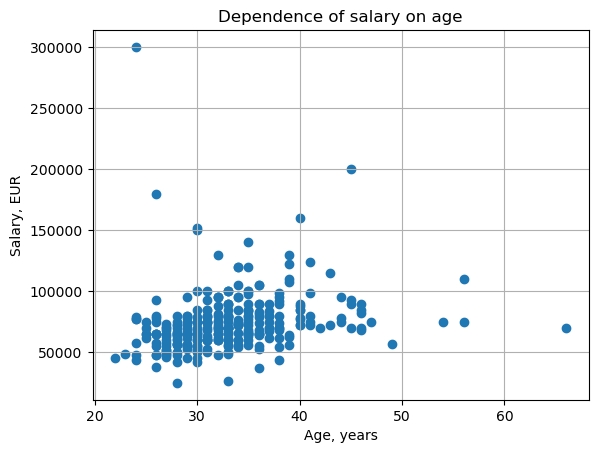

In [20]:
# 2 Зависимость от возраста
# Будем рассматривать только мужчин проживающих в Германии, работающих 40 часов в неделю
# Переменные: кол-во рабочих часов, возраст, страна, пол, зарплата
import matplotlib.pyplot as plt
df2 = df[df["Country"] == "Germany"]
df2 = df2[df2["Working week hours"] == 40]
df2 = df2[df2["Gender"] == "Male"]
df2.drop(["Gender", "City", 'Position', 'Experience', 'Seniority level',
       'Main technology', 'Additional technology', 'Prev salary',
       'Employment status', 'Communication language', 'Company size',
       'Company type', 'Job loss in rough time', 'Support in rough time',
       'Salary difference', 'Working week hours', 'Country',
       'Number of respondents'], axis=1, inplace=True)
plt.scatter(x=df2["Age"], y=df2["Salary"])
plt.grid()
plt.title("Dependence of salary on age")
plt.xlabel("Age, years")
plt.ylabel("Salary, EUR")
plt.show()
# Дополнение: можно было взять среднее значение зарплаты каждого года и построить линейный график

In [21]:
# 3 Зависимость ЗП от языка программирования
# Будем рассматривать только мужчин проживающих в Германии, работающих 40 часов в неделю
# Переменные: кол-во рабочих часов, возраст, страна, основная технология
df3 = df
df3 = df[df["Country"] == "Germany"]
df3 = df3[df3["Working week hours"] == 40]
df3 = df3[df3["Gender"] == "Male"]
df3.drop(["Age", "Gender", "City", 'Position', 'Experience', 'Seniority level',
        'Additional technology', 'Prev salary',
       'Employment status', 'Communication language', 'Company size',
       'Company type', 'Job loss in rough time', 'Support in rough time',
       'Salary difference', 'Working week hours', 'Country',
       'Number of respondents'], axis=1, inplace=True)
df3 = (df3.groupby(["Main technology"])[["Salary"]].mean()).sort_values(by="Salary")

In [22]:
df3

,Salary
Main technology,
C#/.NET,48000.0
c#,49000.0
"C++, C#",52000.0
Qlik,52000.0
jenkins bash,52500.0
...,...
Spark,125000.0
Cloud,127500.0
SAP,130000.0


In [23]:
# 4 Зависимость ЗП от пола
# Будем рассматривать рабочих с Германии, работающих 40 часов в неделю
#
# Переменные: кол-во рабочих часов, пол, страна, уровень программирования
from colorama import *
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
df4 = df
df4 = df[df["Country"] == "Germany"]
df4 = df4[df4["Working week hours"] == 40]
df4.drop(["Age", "City", 'Position', 'Experience',
        'Additional technology', 'Prev salary',
       'Employment status', 'Communication language', 'Company size',
       'Company type', 'Job loss in rough time', 'Support in rough time',
       'Salary difference', 'Working week hours', 'Country', 'Main technology',
       'Number of respondents'], axis=1, inplace=True)
df4_woman = df4[df4["Gender"] == "Female"]
df4_man = df4[df4["Gender"] == "Male"]

print(Fore.RED+str(round(df4_woman["Salary"].mean()))+Fore.RESET + " - средняя зарплата"+Style.BRIGHT+" женщин"+Style.RESET_ALL+" разных уровней программирования (junior, senior, etc)")
# Решил не разбивать по уровню программирования, так как многие junior зарабатывают столько же, как и senior
print(Fore.GREEN+str(round(df4_man["Salary"].mean()))+Fore.RESET + " - средняя зарплата"+Style.BRIGHT+" мужчин"+Style.RESET_ALL+" разных уровней программирования (junior, senior, etc)")

df4_woman_senior = df4_woman[df4_woman["Seniority level"] == "Senior"]
df4_man_senior = df4_man[df4_man["Seniority level"] == "Senior"]
print(Fore.RED+str(round((df4_woman_senior["Salary"].mean())))+Fore.RESET + " - средняя зарплата"+Style.BRIGHT+" женщин"+Style.RESET_ALL+" уровня senior")
print(Fore.GREEN+str(round((df4_man_senior["Salary"].mean())))+Fore.RESET + " - средняя зарплата"+Style.BRIGHT+" мужчин"+Style.RESET_ALL+" уровня senior")

count_heads_woman = (df4_woman[df4_woman["Seniority level"] == "Head"]).index
count_heads_man = (df4_man[df4_man["Seniority level"] == "Head"]).index
count_leads_woman = (df4_woman[df4_woman["Seniority level"] == "Lead"]).index
count_leads_man = (df4_man[df4_man["Seniority level"] == "Lead"]).index
print(f"количество директоров {color.BOLD}женщин{color.END} - {Fore.RED+str(len(count_heads_woman))+Fore.RESET}")
print(f"количество директоров {color.BOLD}мужчин{color.END} - {Fore.GREEN+str(len(count_heads_man))+Fore.RESET}")
print(f"количество лидов {color.BOLD}женщин{color.END} - {Fore.RED+str(len(count_leads_woman))+Fore.RESET}")
print(f"количество лидов {color.BOLD}мужчин{color.END} - {Fore.GREEN+str(len(count_leads_man))+Fore.RESET}")

60432 - средняя зарплата женщин разных уровней программирования (junior, senior, etc)
74426 - средняя зарплата мужчин разных уровней программирования (junior, senior, etc)
65650 - средняя зарплата женщин уровня senior
75820 - средняя зарплата мужчин уровня senior
количество директоров женщин - 0
количество директоров мужчин - 6
количество лидов женщин - 0
количество лидов мужчин - 43


<BarContainer object of 2 artists>

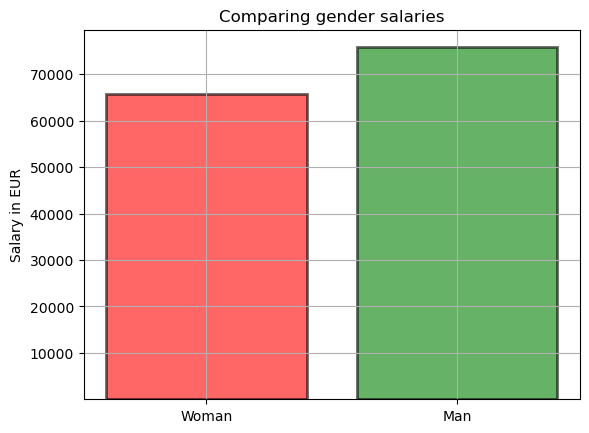

In [24]:
from importlib import reload
plt = reload(plt)
groups4 = ["Woman", "Man"]
counts4 = [round((df4_woman_senior["Salary"].mean())), round((df4_man_senior["Salary"].mean()))]
plt.ylabel("Salary in EUR")
plt.grid()
plt.title("Comparing gender salaries")
plt.bar(groups4, counts4, alpha=0.6, bottom=2, color=['r', 'g'], edgecolor="k", linewidth=2)

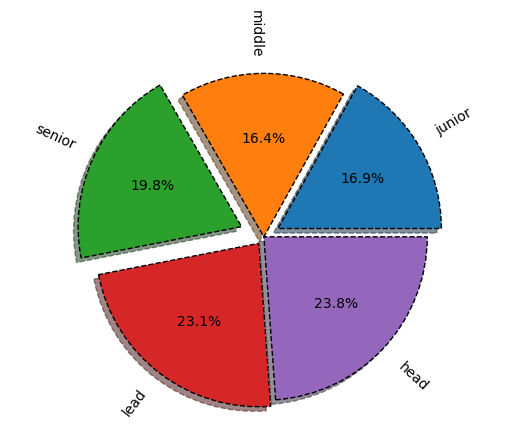

In [25]:
# 5 Зависимость ЗП от уровня программирования
# Будем рассматривать мужчин с Германии, работающих 40 часов в неделю
# Переменные: кол-во рабочих часов, пол, страна, уровень программирования
df5 = df
df5 = df[df["Country"] == "Germany"]
df5 = df5[df5["Working week hours"] == 40]
df5 = df5[df5["Gender"] == "Male"]
df5_junior = df5[df5["Seniority level"] == "Junior"]
df5_middle = df5[df5["Seniority level"] == "Middle"]
df5_senior = df5[df5["Seniority level"] == "Senior"]
df5_lead = df5[df5["Seniority level"] == "Lead"]
df5_head = df5[df5["Seniority level"] == "Head"]
all_len = len(df5_junior["Salary"].tolist()) + \
          len(df5_middle["Salary"].tolist()) + \
          len(df5_senior["Salary"].tolist()) + \
          len(df5_lead["Salary"].tolist()) + \
          len(df5_head["Salary"].tolist())
salary_junior = round(df5_junior["Salary"].mean())
salary_middle = round(df5_middle["Salary"].mean())
salary_senior = round(df5_senior["Salary"].mean())
salary_lead = round(df5_lead["Salary"].mean())
salary_head = round(df5_head["Salary"].mean())
salaries = [salary_junior, salary_middle, salary_senior, salary_lead, salary_head]
labels = ["junior", "middle", "senior", "lead", "head"]
explode = (0.1, 0, 0.15, 0.05, 0)
import matplotlib.pyplot as plt
fig5, ax5 = plt.subplots()
ax5.pie(salaries, labels=labels, explode=explode, shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True, autopct='%1.1f%%')
ax5.axis("equal")
plt.show()


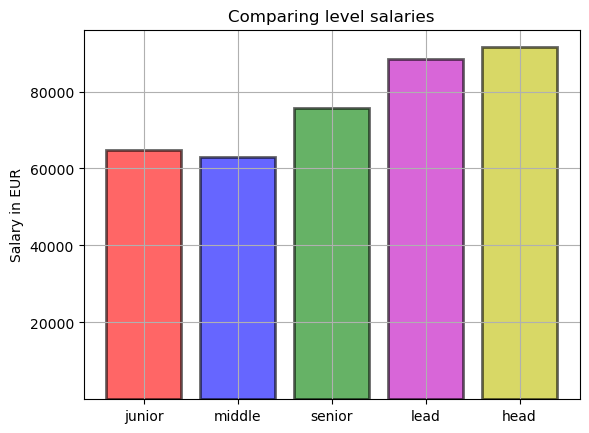

In [26]:
import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)
colors = ["r", "b", "g", "m", "y"]
plt.bar(labels, salaries, alpha=0.6, bottom=2, color=colors, edgecolor="k", linewidth=2)
label = "Comparing level salaries"
plt.title(label)
plt.grid()
plt.ylabel("Salary in EUR")
plt.show()

In [27]:
# 6 Зависимость ЗП от опыта
# Рассмотрим только граждан Германии с разным количеством рабочих часов
# Переменные: ЗП, опыт, страна
df6 = df
df6 = df6[df6["Country"] == "Germany"]
pd.to_numeric(df6["Experience"], errors='coerce',downcast='float')
df6.groupby("Experience")[["Salary"]].mean()

,Salary
Experience,
0.8,48000.000000
1,81687.500000
"1,5",46000.000000
1.5,58000.000000
10,75644.300000
11,75381.818182
12,84247.826087
13,82250.000000
14,76730.769231


In [28]:
# опыт работы сильно влияет на зарплату до 20 годов. Далее не так сильно

In [29]:
# 7 Зависимость ЗП от размера компании
# Рассмотрим только рабочих, работающих в Германии 40 часов в неделю
# Переменные: ЗП, размер компании,
df7 = df
df7 = df7[df7["Country"] == "Germany"]
df7 = df7[df7["Gender"] == "Male"]
df7 = df7[df7["Working week hours"] == 40]
df7.drop([
    "Age", "Gender", "City", "Position", "Experience", "Main technology",
    "Additional technology", "Prev salary", "Employment status", "Communication language", "Company type",
    "Support in rough time", "Salary difference", "Working week hours", "Country", "Number of respondents",
    "Job loss in rough time"
],
         axis=1, inplace=True)
df7_company_size_list = df7["Company size"].tolist()
print(set(df7_company_size_list))

df7_company_size_up_to_10 = df7[df7["Company size"] == "up to 10"]
df7_company_size_up_to_10.groupby("Seniority level")[["Salary"]].mean()


{'101-1000', '1000+', '11-50', '51-100', 'up to 10'}


,Salary
Seniority level,
Head,84000.000000
Junior,41750.000000
Lead,108000.000000
Middle,46500.000000
Self employed,200000.000000
Senior,91566.666667


In [30]:
df7_company_size_11_50 = df7[df7["Company size"] == "11-50"]
df7_company_size_11_50.groupby("Seniority level")[["Salary"]].mean()

,Salary
Seniority level,
Head,95000.000000
Junior,51125.000000
Lead,77727.272727
Middle,55590.909091
Senior,69510.526316
nan,55000.000000


In [31]:
df7_company_size_51_100 = df7[df7["Company size"] == "51-100"]
df7_company_size_51_100.groupby("Seniority level")[["Salary"]].mean()

,Salary
Seniority level,
Junior,48000.000000
Lead,93250.000000
Middle,60083.333333
Senior,68400.000000
nan,62000.000000


In [32]:
df7_company_size_101_1000 = df7[df7["Company size"] == "101-1000"]
df7_company_size_101_1000.groupby("Seniority level")[["Salary"]].mean()

,Salary
Seniority level,
Head,93333.333333
Junior,88000.000000
Lead,87250.000000
Middle,60606.000000
Senior,73512.244898


In [33]:
df7_company_size_1000 = df7[df7["Company size"] == "1000+"]
df7_company_size_1000.groupby("Seniority level")[["Salary"]].mean()

,Salary
Seniority level,
Head,90000.000000
Junior,57500.000000
Lead,93400.000000
Manager,89200.000000
Middle,71934.782609
Senior,80446.322581
Work Center Manager,68000.000000


In [34]:
df7.pivot_table("Salary", index="Company size", columns="Seniority level")

Seniority level,Head,Junior,Lead,Manager,Middle,Self employed,Senior,Work Center Manager,nan
Company size,,,,,,,,,
1000+,90000.000000,57500.0,93400.000000,89200.0,71934.782609,NaN,80446.322581,68000.0,NaN
101-1000,93333.333333,88000.0,87250.000000,NaN,60606.000000,NaN,73512.244898,NaN,NaN
11-50,95000.000000,51125.0,77727.272727,NaN,55590.909091,NaN,69510.526316,NaN,55000.0
51-100,NaN,48000.0,93250.000000,NaN,60083.333333,NaN,68400.000000,NaN,62000.0
up to 10,84000.000000,41750.0,108000.000000,NaN,46500.000000,200000.0,91566.666667,NaN,NaN


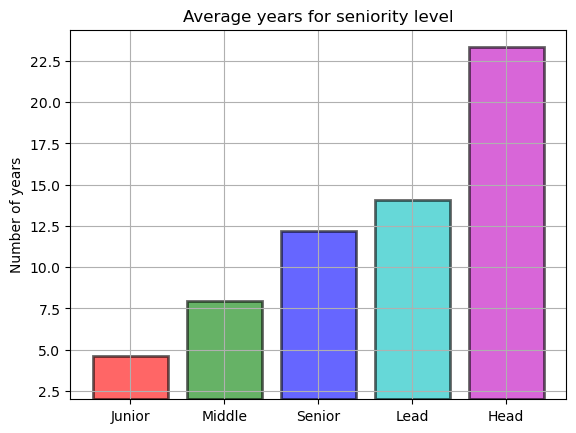

In [35]:
# 8 Зависимость уровня от опыта
# Берем граждан всех стран. Рассмотрим только уровни Junior, Middle, Senior, Lead, Head
df8 = df.copy()
df8.drop([
    'Age', 'Gender', 'City', 'Position',
       'Main technology', 'Additional technology', 'Salary', 'Prev salary',
       'Employment status', 'Communication language', 'Company size',
       'Company type', 'Job loss in rough time', 'Support in rough time',
       'Salary difference', 'Working week hours', 'Country',
       'Number of respondents'
], axis=1, inplace=True)

def array_from_str_to_float(str_array):
    float_array = [0] * len(str_array)
    for qqq in range(len(str_array)):
        try:
            str_array[qqq] = str_array[qqq].replace(',', '.')
            float_array[qqq] = float(str_array[qqq])
        except:
            float_array[qqq] = float_array[qqq-1]
    return float_array

df8_junior = df8[df8["Seniority level"] == "Junior"]
df8_junior = df8_junior["Experience"]
df8_jun_years = array_from_str_to_float(df8_junior.tolist())
jun_average_years = sum(df8_jun_years) / len(df8_jun_years)

df8_middle = df8[df8["Seniority level"] == "Middle"]
df8_middle = df8_middle["Experience"]
df8_mid_years = array_from_str_to_float(df8_middle.tolist())
mid_average_years = sum(df8_mid_years) / len(df8_mid_years)

df8_senior = df8[df8["Seniority level"] == "Senior"]
df8_senior = df8_senior["Experience"]
df8_sen_years = array_from_str_to_float(df8_senior.tolist())
sen_average_years = sum(df8_sen_years) / len(df8_sen_years)

df8_lead = df8[df8["Seniority level"] == "Lead"]
df8_lead = df8_lead["Experience"]
df8_lead_years = array_from_str_to_float(df8_lead.tolist())
lead_average_years = sum(df8_lead_years) / len(df8_lead_years)

df8_head = df8[df8["Seniority level"] == "Head"]
df8_head = df8_head["Experience"]
df8_head_years = array_from_str_to_float(df8_head.tolist())
head_average_years = sum(df8_head_years) / len(df8_head_years)

import matplotlib.pyplot as plt
from importlib import reload
labels8 = ["Junior", "Middle", "Senior", "Lead", "Head"]
salaries8 = [jun_average_years, mid_average_years, sen_average_years, lead_average_years, head_average_years]
colors8 = ["r", "g", "b", "c", "m"]
plt.bar(labels8, salaries8, alpha=0.6, bottom=2, color=colors8, edgecolor="k", linewidth=2)
plt.title("Average years for seniority level")
plt.grid()
plt.ylabel("Number of years")
plt.show()

In [36]:
# 9 Сравнение ЗП Python-программистов и C#-программистов
# Будем рассматривать только мужчин, работающих в Германии 40 часов в неделю. Уровень программирования = 
# junior, middle, senior, lead
df9 = df
df9 = df9[df9["Country"] == "Germany"]
df9 = df9[df9["Gender"] == "Male"]
df9 = df9[df9["Working week hours"] == 40]
df9.drop([
'Age', 'Gender', 'City', 'Position', 'Experience', 'Additional technology', 'Prev salary',
       'Employment status', 'Communication language', 'Company size',
       'Company type', 'Job loss in rough time', 'Support in rough time',
       'Salary difference', 'Working week hours', 'Country',
       'Number of respondents'
], axis=1, inplace=True)
def python_or_c_sharp_in_main_technology(x):
    if "python" in str(x).lower(): return True
    elif "c#" in str(x).lower(): return True
    elif ".net" in str(x).lower(): return True
    return False
def python_is_main_technology(x):
    if "python" in str(x).lower(): return True
    return False
def csharp_is_main_technology(x):
    if "c#" in str(x).lower(): return True
    elif ".net" in str(x).lower(): return True
    return False
df9 = df9[df9["Main technology"].apply(lambda x: python_or_c_sharp_in_main_technology(x))]

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
# juniors
df9_all_jun = df9[df9["Seniority level"] == "Junior"]
df9_jun_python = df9_all_jun[df9_all_jun["Main technology"].apply(lambda x: python_is_main_technology(x))]
df9_jun_cSharp = df9_all_jun[df9_all_jun["Main technology"].apply(lambda x: csharp_is_main_technology(x))]
print(color.BOLD+"===JUNIORS==="+color.END)
print(f"junior {color.BOLD}python{color.END}-программисты {color.RED + str(round(df9_jun_python['Salary'].mean())) + color.END} €")
print(f"junior {color.BOLD}C#{color.END}-программисты {color.GREEN + str(round(df9_jun_cSharp['Salary'].mean())) + color.END} €")
# middles
df9_all_mid = df9[df9["Seniority level"] == "Middle"]
df9_mid_python = df9_all_mid[df9_all_mid["Main technology"].apply(lambda x: python_is_main_technology(x))]
df9_mid_cSharp = df9_all_mid[df9_all_mid["Main technology"].apply(lambda x: csharp_is_main_technology(x))]
print(color.BOLD+"===MIDDLES==="+color.END)
print(f"middle {color.BOLD}python{color.END}-программисты {color.GREEN + str(round(df9_mid_python['Salary'].mean())) + color.END} €")
print(f"middle {color.BOLD}C#{color.END}-программисты {color.RED + str(round(df9_mid_cSharp['Salary'].mean())) + color.END} €")
# seniors
df9_all_sen = df9[df9["Seniority level"] == "Senior"]
df9_sen_python = df9_all_sen[df9_all_sen["Main technology"].apply(lambda x: python_is_main_technology(x))]
df9_sen_cSharp = df9_all_sen[df9_all_sen["Main technology"].apply(lambda x: csharp_is_main_technology(x))]
print(color.BOLD+"===SENIORS==="+color.END)
print(f"senior {color.BOLD}python{color.END}-программисты {color.GREEN + str(round(df9_sen_python['Salary'].mean())) + color.END} €")
print(f"senior {color.BOLD}C#{color.END}-программисты {color.RED + str(round(df9_sen_cSharp['Salary'].mean())) + color.END} €")
# leads
df9_all_lead = df9[df9["Seniority level"] == "Lead"]
df9_lead_python = df9_all_lead[df9_all_lead["Main technology"].apply(lambda x: python_is_main_technology(x))]
df9_lead_cSharp = df9_all_lead[df9_all_lead["Main technology"].apply(lambda x: csharp_is_main_technology(x))]
print(color.BOLD+"===LEADS==="+color.END)
print(f"lead {color.BOLD}python{color.END}-программисты {color.GREEN + str(round(df9_lead_python['Salary'].mean())) + color.END} €")
print(f"lead {color.BOLD}C#{color.END}-программисты {color.RED + str(round(df9_lead_cSharp['Salary'].mean())) + color.END} €")


===JUNIORS===
junior python-программисты 52143 €
junior C#-программисты 55500 €
===MIDDLES===
middle python-программисты 63326 €
middle C#-программисты 57667 €
===SENIORS===
senior python-программисты 75677 €
senior C#-программисты 70350 €
===LEADS===
lead python-программисты 88667 €
lead C#-программисты 79200 €


In [37]:
# 10 Является ли работа в IT стабильной?
# Будем рассматривать граждан Германии, работающих на разные ставки
# Процент уволенных в сложные времена
# Процент людей, которым оказали помощь
df10 = df.copy()
df10 = df10[df10["Country"] == "Germany"]
df10.drop([
'Age', 'Gender', 'City', 'Position', 'Experience', 'Seniority level',
       'Main technology', 'Additional technology', 'Salary', 'Prev salary',
       'Employment status', 'Communication language', 'Company size',
       'Company type',
       'Salary difference', 'Working week hours', 'Country',
       'Number of respondents'
], axis=1, inplace=True)
count_of_respondents = len(df10["Job loss in rough time"].tolist())
df10_loss_job = df10[df10["Job loss in rough time"] == True]
lines = df10_loss_job.shape[0]

df10_get_support = df10[df10["Job loss in rough time"] == False]
all_people_support = df10_get_support.shape[0]

df10_get_support = df10[df10["Support in rough time"].apply(lambda x: True if x > 0 else False)]
count_support = df10_get_support.shape[0]
print(color.BOLD+"===ГЕРМАНИЯ==="+color.END)
print(f"{color.RED + str(round(lines/count_of_respondents * 100)) + color.END}% программистов было уволено во время коронавируса")
print(f"{color.GREEN + str(round(count_support / all_people_support * 100)) + color.END}% программистам компании оказали материальную поддержку во время коронавируса")

===ГЕРМАНИЯ===
3% программистов было уволено во время коронавируса
17% программистам компании оказали материальную поддержку во время коронавируса
